# Rotation


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import matplotlib as mpl

In [5]:
def displayImageActualSize(I):
    dpi = mpl.rcParams['figure.dpi']
    H,W = I.shape[0:2]
    figSize = W/float(dpi), H/float(dpi)
    fig = plt.figure(figsize=figSize)
    ax = fig.add_axes([0,0,1,1])
    ax.axis('off')
    ax.imshow(I,cmap='grey')
    plt.show

In [6]:
 def f_bilinearInterpolation(r,c,I):
    lc = int(c)
    rc = lc+1
    wr = c - lc
    wl = rc - c
    tr = int(r)
    br = tr + 1
    wt = br - r
    wb = r-tr
    if tr>=0 and br<I.shape[0] and lc>=0 and rc<I.shape[1]:
        a = I[tr,lc]*wl + wr*I[tr,rc]
        b = I[br,lc]*wl + wr*I[br,rc]
        g = wt*a+wb*b
        return np.uint8(g)
    else:
        return 0


In [7]:
def Scale_Image(s,grey_image):
    row = grey_image.shape[0]
    col = grey_image.shape[1]
    s2 = np.array([[s,0],[0,s]])
    I2 = np.zeros((s*row,s*col),dtype='uint8')
    P_inv = np.linalg.inv(s2)
    for new_i in range(I2.shape[0]):
        for new_j in range(I2.shape[1]):
            P_dash = np.array([new_i,new_j])
            P = P_inv.dot(P_dash)
            #P = np.int16(np.floor(P))
            i, j = P[0],P[1]
            
            if i< 0 or i>=row or j<0 or j>=col:
                pass
            else:
                g = f_bilinearInterpolation(i,j,grey_image)
                I2[new_i,new_j] = g
    return I2
            

            


In [8]:
I_grey = cv2.imread(r'grey.jpg',cv2.IMREAD_GRAYSCALE)
row, col = I_grey.shape[0],I_grey.shape[1]

In [25]:
a = 45
ca = np.cos(np.deg2rad(a))
sa = np.sin(np.deg2rad(a))
R = np.array([[ca,-sa],[sa,ca]])
rMax, cMax = I_grey.shape[0], I_grey.shape[1]
Cords = np.array([[0,0],[0,cMax-1],[rMax-1,0],[rMax-1,cMax-1]])
a_dash = R.dot(Cords.T)
mins = a_dash.min(axis=1)
maxs = a_dash.max(axis=1)
minR = np.int64(np.floor(mins[0]))
minC = np.int64(np.floor(mins[1]))
maxR = np.int64(np.ceil(maxs[0]))
maxC = np.int64(np.ceil(maxs[1]))
H,W = maxR-minR+1,maxC-minC+1
I2 = np.zeros((H,W),dtype='uint8')

ValueError: shapes (2,3) and (2,4) not aligned: 3 (dim 1) != 2 (dim 0)

In [10]:
Tinv = np.linalg.inv(R)
for new_i in range(minR,maxR):
    for new_j in range(minC,maxC):
        p_dash = np.array([new_i,new_j])
        P = Tinv.dot(p_dash)
        i, j = P[0],P[1]
        if i<0 or i>=row or j<0 or j>=col:
            pass
        else:
            g = f_bilinearInterpolation(i,j,I_grey)
            I2[new_i-minR,new_j-minC] = g

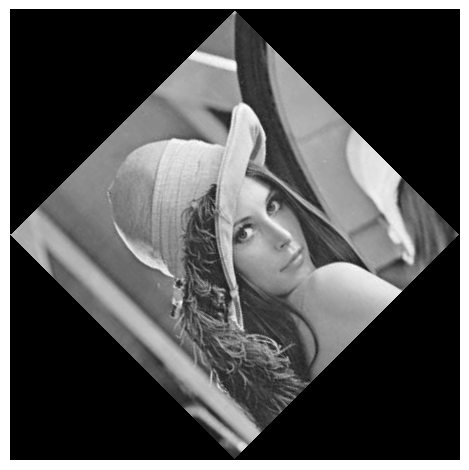

In [11]:
displayImageActualSize(I2)

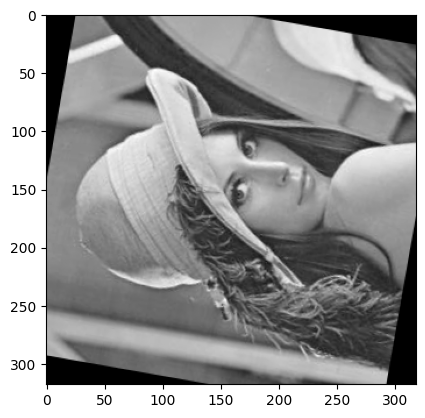

In [12]:
I_grey = cv2.imread(r'grey.jpg',cv2.IMREAD_GRAYSCALE)
image_center = tuple(np.array(I_grey.shape[1::-1])/2)
a = 80
scale = 1.0
rot_matrix = cv2.getRotationMatrix2D(image_center,a,scale)
i = cv2.warpAffine(I_grey, rot_matrix,I_grey.shape[::-1])
plt.imshow(i,cmap='grey')

# Reflection

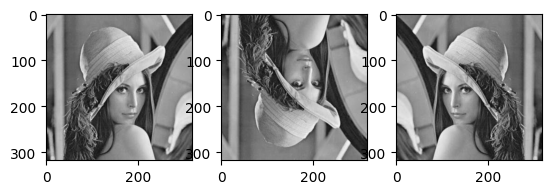

In [13]:
image = cv2.flip(I_grey,0)
image2 = cv2.flip(I_grey,1)
plt.subplot (131)
plt.imshow(I_grey,cmap='grey')
plt.subplot(132)
plt.imshow(image,cmap='grey')
plt.subplot(133)
plt.imshow(image2, cmap='grey')
plt.show()

# Shear

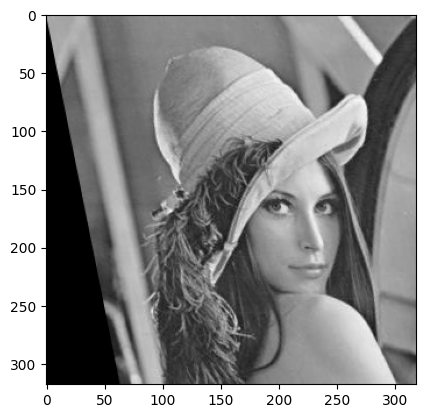

In [14]:
shear_factor_x = 0.2
M_shear = np.float32([[1, shear_factor_x, 0],
                      [0, 1, 0]])
shear_image = cv2.warpAffine(I_grey,M_shear,I_grey.shape)
plt.imshow(shear_image,cmap='grey')


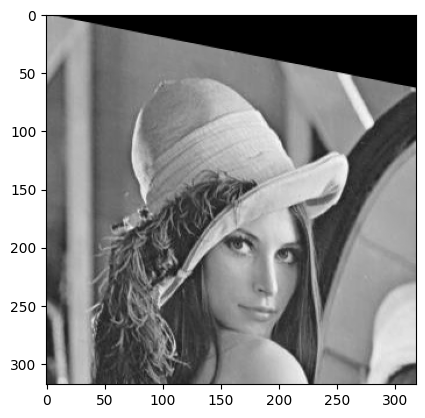

In [15]:
shear_factor_y = 0.2
M_shear = np.float32([[1, 0,0],
                      [shear_factor_y, 1,0]])
shear_image = cv2.warpAffine(I_grey,M_shear,I_grey.shape)
plt.imshow(shear_image,cmap='grey')

# Translation is non Linear


In [29]:
a = 45
ca = np.cos(np.deg2rad(a))
sa = np.sin(np.deg2rad(a))
R = np.array([[ca,-sa,1],[sa,ca,1]])

In [33]:
def f_getExtentsAffine(T,rMax,cMax):
    Cords = np.array([[0,0,1],[0,cMax-1,1],[rMax-1,0,1],[rMax-1,cMax-1,1]])
    a_dash = T.dot(Cords.T)
    mins = a_dash.min(axis=1)
    maxs = a_dash.max(axis=1)
    minR = np.int64(np.floor(mins[0]))
    minC = np.int64(np.floor(mins[1]))
    maxR = np.int64(np.ceil(maxs[0]))
    maxC = np.int64(np.ceil(maxs[1]))
    H,W = maxR-minR+1,maxC-minC+1
    return minR,minC,maxR,maxC,H,W

In [38]:
def f_transformAffine(T,grey_image):
    rMax, cMax = image.shape[0],image.shape[1]
    minR,minC,maxR,maxC,H,W = f_getExtentsAffine(T,rMax,cMax)
    I2 = np.zeros((H,W),dtype='uint8')
    P_inv = np.linalg.inv(T)
    for new_i in range(minR,maxR):
        for new_j in range(minC,maxC):
            P_dash = np.array([new_i,new_j,1])
            P = P_inv.dot(P_dash)
            #P = np.int16(np.floor(P))
            i, j = P[0],P[1]
            
            if i< 0 or i>=row or j<0 or j>=col:
                pass
            else: 
                g = f_bilinearInterpolation(i,j,grey_image)
                I2[new_i-minR,new_j-minC] = g
    return I2        


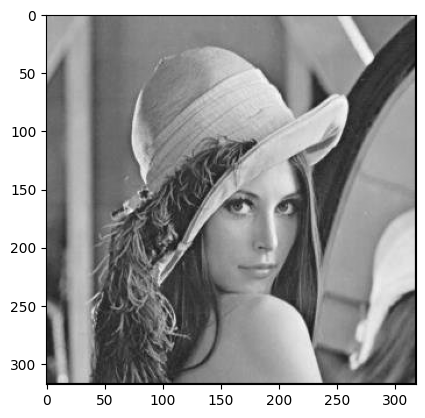

In [50]:
T = np.array([[1,0,10],[0,1,20],[0,0,1]])
I_grey = cv2.imread(r'grey.jpg',cv2.IMREAD_GRAYSCALE)
I2= f_transformAffine(T,I_grey)
plt.imshow(I2,cmap='gray')

In [42]:
a = 30
ca = np.cos(np.deg2rad(a))
sa = np.sin(np.deg2rad(a))
R = np.array([[ca,-sa,0],[sa,ca,0],[0,0,1]])
T = np.array([[1,0,-300],[0,1,-400],[0,0,1]])
A = np.linalg.inv(T).dot(R).dot(T)

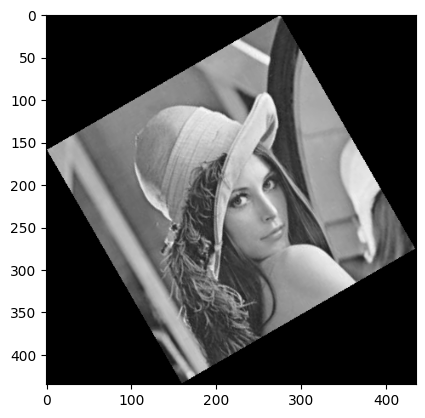

In [46]:
plt.imshow(f_transformAffine(A,I_grey),cmap='gray')

## Reflection about a Line


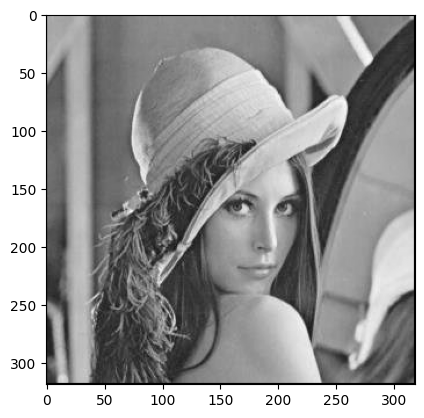

In [74]:
a = 10
ca = np.cos(np.deg2rad(a))
sa = np.sin(np.deg2rad(a))
R = np.array([[ca,-sa,0],[sa,ca,0],[0,0,1]])
T = np.array([[1,0,-300],[0,1,-400],[0,0,1]])
RF = np.array([[1,0,0],[0,1,0],[0,0,1]])
A = np.linalg.inv(T).dot(np.linalg.inv(R)).dot(RF).dot(R).dot(T)
plt.imshow(f_transformAffine(A,I_grey),cmap='gray')

## Projective Transformation

In [78]:
def f_Projective(T,rMax,cMax):
    Cords = np.array([[0,0,1],[0,cMax-1,1],[rMax-1,0,1],[rMax-1,cMax-1,1]])
    a_dash = T.dot(Cords.T)
    a_dash = a_dash/a_dash[2,:]
    mins = a_dash.min(axis=1)
    maxs = a_dash.max(axis=1)
    minR = np.int64(np.floor(mins[0]))
    minC = np.int64(np.floor(mins[1]))
    maxR = np.int64(np.ceil(maxs[0]))
    maxC = np.int64(np.ceil(maxs[1]))
    H,W = maxR-minR+1,maxC-minC+1
    return minR,minC,maxR,maxC,H,W

In [85]:
def f_transformProjective(T,grey_image):
    rMax, cMax = image.shape[0],image.shape[1]
    minR,minC,maxR,maxC,H,W = f_Projective(T,rMax,cMax)
    I2 = np.zeros((H,W),dtype='uint8')
    P_inv = np.linalg.inv(T)
    for new_i in range(minR,maxR):
        for new_j in range(minC,maxC):
            P_dash = np.array([new_i,new_j,1])
            P = P_inv.dot(P_dash)
            P=P/P[2]
            i, j = P[0],P[1]
            
            if i< 0 or i>=row or j<0 or j>=col:
                pass
            else: 
                g = f_bilinearInterpolation(i,j,grey_image)
                I2[new_i-minR,new_j-minC] = g
    return I2        


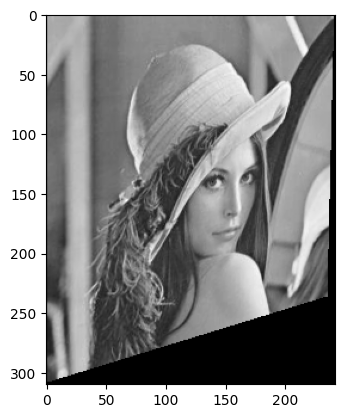

In [88]:
a = 10
ca = np.cos(np.deg2rad(a))
sa = np.sin(np.deg2rad(a))
R = np.array([[ca,-sa,0],[sa,ca,0],[0,0,1]])
T = np.array([[1,0,-300],[0,1,-400],[0,0,1]])
RF = np.array([[1,0,0],[0,1,0],[0,0,1]])
A = np.linalg.inv(T).dot(np.linalg.inv(R)).dot(RF).dot(R).dot(T)
H = A
H[2,:] = np.array([0.0001,0.001,1])
plt.imshow(f_transformProjective(A,I_grey),cmap='gray')